# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_results.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
len(mouse_results["Mouse ID"].unique())

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_results.loc[mouse_results.duplicated(subset=["Mouse ID", "Timepoint"]) == True, :]
duplicates["Mouse ID"]

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = mouse_results.loc[mouse_results["Mouse ID"] == "g989", :]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
remove_g989 = mouse_results.loc[mouse_results["Mouse ID"] != 'g989']
remove_g989.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
len(remove_g989["Mouse ID"].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = remove_g989.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = remove_g989.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = remove_g989.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = remove_g989.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
stderr = remove_g989.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
"Mean Tumor Volume" : mean,
"Median Tumor Volume" : median,
"Tumor Volume Variance" : variance,
"Tumor Volume Std. Dev." : std,
"Tumor Std. Err" : stderr
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
ad_summary=pd.DataFrame(remove_g989.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"]))
ad_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

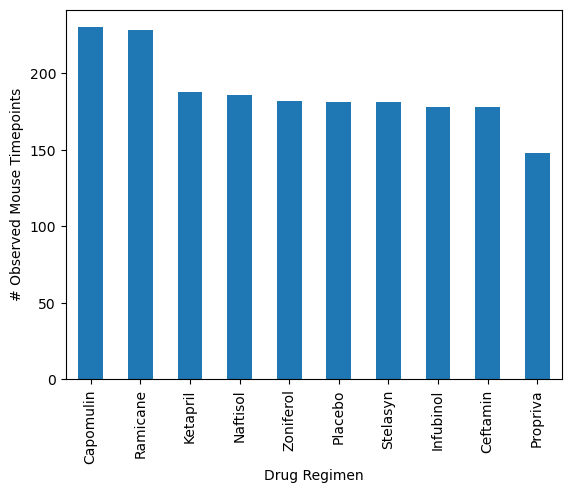

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = remove_g989["Drug Regimen"].value_counts()
counts.plot(kind="bar")
counts_plot = plt.ylabel("# Observed Mouse Timepoints")
plt.show()

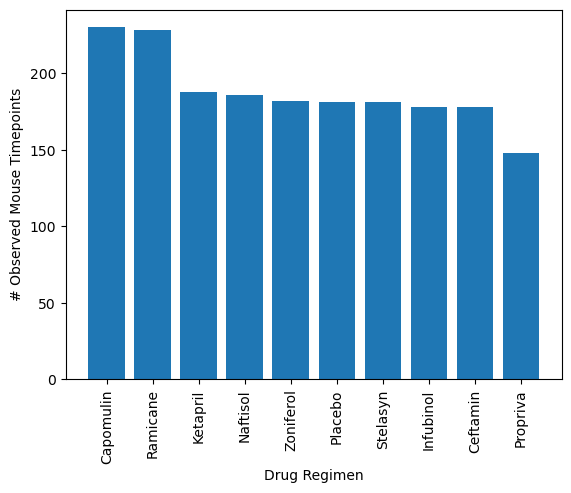

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pandas = plt.bar(counts.index, counts)
plt.xlabel("Drug Regimen")
plt.ylabel("# Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

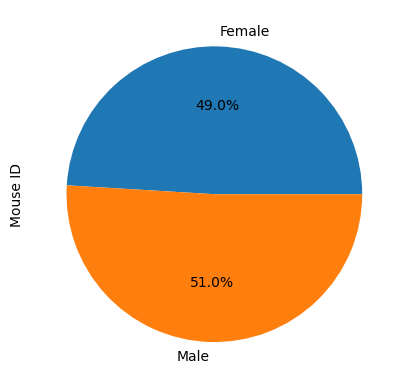

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = remove_g989.groupby(["Sex"])["Mouse ID"].count()
sex.plot(kind="pie", autopct="%1.1f%%")
plt.show()

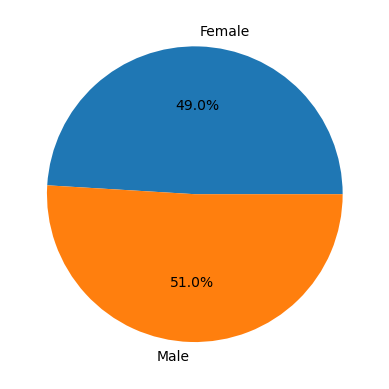

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex,labels=sex.index, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = remove_g989.groupby("Mouse ID")["Timepoint"].max()
last_timepoint_df = pd.DataFrame(last_timepoint, index=last_timepoint.index)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoint, remove_g989, on=["Mouse ID", "Timepoint"], how="inner")
merged_df = merged_df.loc[(merged_df["Drug Regimen"] == 'Capomulin') \
                        | (merged_df["Drug Regimen"] == 'Ramicane') \
                        | (merged_df["Drug Regimen"] == 'Infubinol') \
                        | (merged_df["Drug Regimen"] =='Ceftamin') ]
merged_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_final = []
    
# Locate the rows which contain mice on each drug and get the tumor volumes
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
    volume = merged_df["Tumor Volume (mm3)"][merged_df["Drug Regimen"] == drug]
    quartiles = volume.quantile([0.25, 0.5, 0.75])
    firstq = quartiles[0.25]
    thirdq = quartiles[0.75]
    iqr = thirdq - firstq

    # Determine outliers using upper and lower bounds
    outliers = []
    for vol in volume:
        if (vol > thirdq + (1.5 * iqr)) or (vol < (firstq - 1.5 * iqr)):
            outliers.append(vol)
    print(f'{drug}\'s potential outliers are {outliers}.')
    tumor_volume_final.append(tuple(volume))

Capomulin's potential outliers are [].
Ramicane's potential outliers are [].
Infubinol's potential outliers are [36.3213458].
Ceftamin's potential outliers are [].


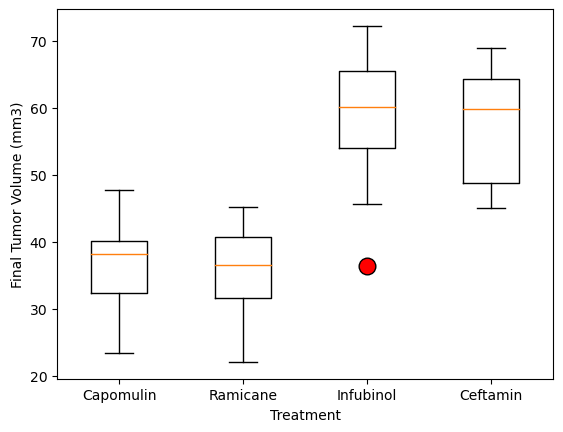

In [17]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_final, flierprops={"markerfacecolor":"red", "markersize":12})
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Treatment")
ticks = [i + 1 for i in range(len(treatment))]
plt.xticks(ticks, labels=treatment)
plt.show()

## Line and Scatter Plots

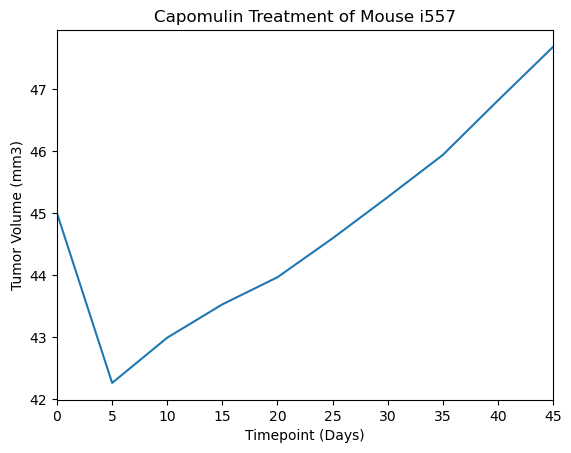

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Create df of all mice treated with Capomulin to plot
capomulin = remove_g989[remove_g989["Drug Regimen"] == 'Capomulin']

# Create df for chosen mouse
mouse_i557 = capomulin.loc[capomulin["Mouse ID"] == "i557"]

# Define dimension and metrics for i557
time = mouse_i557["Timepoint"]
tumor_volume = mouse_i557["Tumor Volume (mm3)"]

# Plot and customize line chart
plt.plot(time, tumor_volume)
plt.xlim(0, max(time))
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse i557")
plt.show()

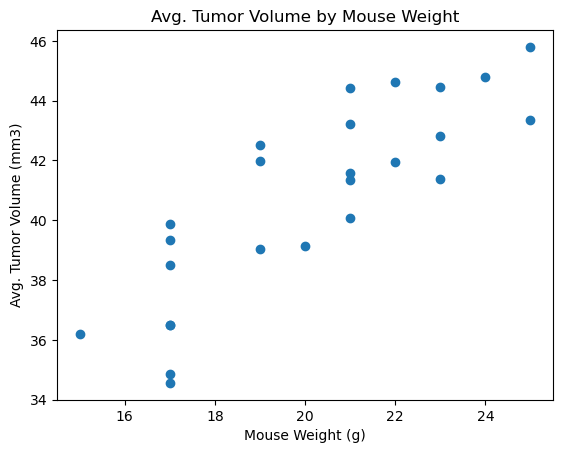

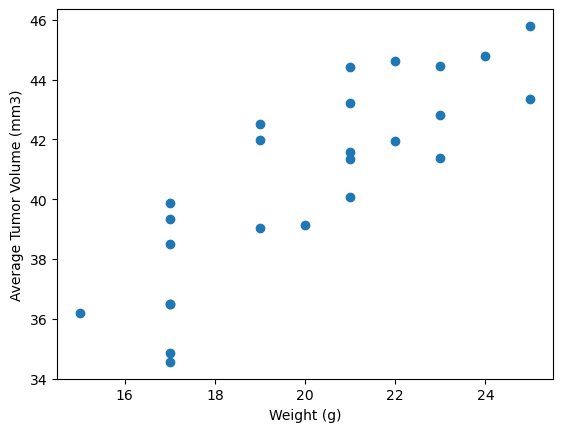

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Isolate weight of mouse and calculate tumor volume of each
mouse_weight = capomulin.groupby("Mouse ID")["Weight (g)"].max()
avg_tumor_weight = capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Create scatterplot of avg. tumor vol by mouse weight
plt.scatter(mouse_weight, avg_tumor_weight)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg. Tumor Volume (mm3)")
plt.title("Avg. Tumor Volume by Mouse Weight")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


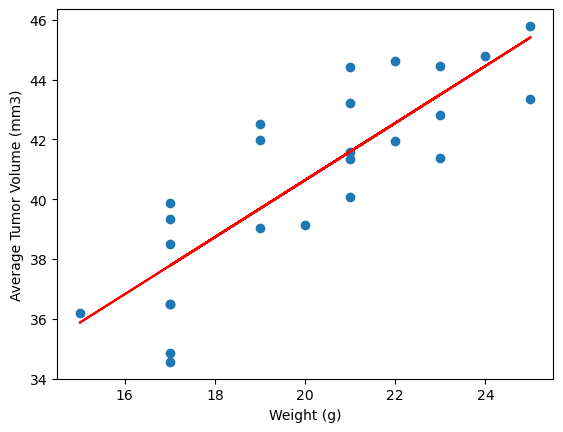

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
